# Logistic Regression - 이진분류( Binary Classification )

### 1. 비용 함수( Cost Function )

- 로지스틱 회귀 또한 경사 하강법을 사용하여 가중치 W( weight )와 편향 b( bias )를 찾아내지만, 비용 함수로는 평균 제곱 오차( MSE )를 사용하지 않는다.
- 그 이유는 시그모이드 함수에 비용 함수를 평균 제곱 오차( MSE )로 하여 그래프를 그리면 다음과 비슷한 형태가 되기 때문이다.

![Alt text]( localmimum.png )

- 로지스틱 회귀에서 평균 제곱 오차( MSE )를 비용 함수로 사용하면 경사 하강법을 사용하였을때 자칫 잘못하면 찾고자 하는 최소값이 아니 잘못된 최소값에 빠질 수 있다.
- 이를 글로별 미니멈( global minimum )이 아닌 특정 구역에서의 최소값인 로컬 미니멈( local minimum )에 도달했다고 한다.
- 이는 cost가 최소가 되는 가중치 W( weight )와 편향 b( bias )를 찾는다는 비용 함수의 목적에 맞지 않는다.

\begin{equation*}
    J( W ) = \frac{1}{n}\sum_{i=1}^nf(H(x^{(i)}),y^{(i)})
\end{equation*}

- 위의 식에서 샘플 데이터의 개수가 n개이고, 어떤 함수 f가 실제값 yi와 예측값 H(xi)의 오차를 나타내는 함수라고 할 때, 여기서 새로운 함수 f를 어떻게 정의하느냐에 따라서 가중치를 최소화하는 적절한 목적 함수가 완성된다. 
- 목적 함수는 전체 데이터에 대해서 어떤 함수 f의 값의 평균을 계산하고 있다. 
- 적절한 가중치를 찾기 위해서는 결과적으로 실제값과 예측값에 대한 오차를 줄여야 하므로 여기서 이 f는 비용 함수(cost function)라고 하겠다. 식을 다시 쓰면 아래와 같다.

\begin{equation*}
    J( W ) = \frac{1}{n}\sum_{i=1}^ncost(H(x^{(i)}),y^{(i)})
\end{equation*}

- 시그모이드 함수는 0과 1사이의 y값을 반환한다. 
- 이는 실제값이 0일 때 y값이 1에 가까워지면 오차가 커지며 실제값이 1일 때 y값이 0에 가까워지면 오차가 커짐을 의미합니다. 그리고 이를 반영할 수 있는 함수는 로그 함수를 통해 표현이 가능합니다.

\begin{equation*}
    if y = 1 \rightarrow cost(H(X),y) = -\log(H(X))
\end{equation*}

\begin{equation*}
    if y = 0 \rightarrow cost(H(X),y) = -\log(1-H(X))
\end{equation*}

- y의 실제값이 1일 때 −logH(x) 그래프를 사용하고 y의 실제값이 0일 때 −log(1−H(X)) 그래프를 사용해야 한다. 
- 위의 두 식을 그래프 상으로 표현하면 아래와 같습니다.

![Alt text]( loss_function.png )

- 실제값이 1일 때의 그래프를 파란색 선으로 표현하였으며, 실제값이 0일 때의 그래프를 빨간색 선으로 표현하였다. 
- 위의 그래프를 설명하면, 실제값이 1일 때, 예측값인 H(X)의 값이 1이면 오차가 0이므로 당연히 cost는 0이 됩니다.반면, 실제값이 1일 때, H(X)가 0으로 수렴하면 cost는 무한대로 발산합니다. 실제값이 0인 경우는 그 반대로 이해하면 됩니다. 
- 이는 다음과 같이 하나의 식으로 표현할 수 있다.

\begin{equation*}
    cost( H(X),y ) = -[ y \log H(X) + ( 1 - y )\log ( 1 - H(X) ) ]
\end{equation*}

- 자세히 보면 y와 (1−y)가 식 중간에 들어갔고, 두 개의 식을 -로 묶은 것 외에는 기존의 두 식이 들어가있는 것을 볼 수 있다. 
- y가 0이면 ylogH(X)가 없어지고, y가 1이면 (1−y)log(1−H(X))가 없어지는데 이는 각각 y가 1일 때와 y가 0일 때의 앞서 본 식과 동일하다.

- 결과적으로 로지스틱 회귀의 목적 함수는 아래와 같다.

\begin{equation*}
    J( W ) = -\frac{1}{n}\sum_{i=1}^n[y^{(i)} \log H(X^{(i)})) + ( 1 - y^{(i)}) )\log ( 1 - H(X^{(i)})) ) ]
\end{equation*}

- 이때 로지스틱 회귀에서 찾아낸 비용 함수를 크로스 엔트로피( Cross Entropy ) 함수라고 한다. 
- 즉, 결론적으로 로지스틱 회귀는 비용 함수로 크로스 엔트로피( Cross Entropy ) 함수를 사용하며, 가중치를 찾기 위해서 크로스 엔트로피( Cross Entropy ) 함수의 평균을 취한 함수를 사용한다. 
- 크로스 엔트로피 함수는 소프트맥스 회귀의 비용 함수이기도 하다.

## 배치( batch )와 에포크( epoch )

- 배치( batch )
   - 모델의 가중치를 한번 업데이터 시킬 때 사용되는 샘플들의 묶음
   - 예로 총 1000개의 훈련 샘플이 있을 때, 배치 사이즈가 20이라면 20개의 샘플 단위마다 모델의 가중치를 한번씩 업데이트 시킨다. 즉, 총 50번( = 1000 / 20 ) 가중치가 업데이트 된다. 하나의 데이터셋을 총 50개의 배치로 나눠서 훈련을 진행한다는 의미
   
- 에포크( epoch )
   - 학습의 횟수를 의미 
   - 예로 에포크가 10이고 배치 사이즈가 20이면 가중치를 50번 업데이트하는 것을 총 10번 반복한다. 각 데이터 샘플이 총 10번씩 사용되는 것이다. 결과적으로 가중치가 총 500번 업데이트 된다.
   
![Alt text]( batch_epoch.png)

- 만약 배치 사이즈가 너무 크면 한번에 처리해야할 양이 많기 때문에 학습 속도가 느려지고, 배치 사이즈가 너무 작으면 적은 샘플을 참조해서 자주 가중치 없데이트 되기 때문에 불안정한 훈련이 된다.
- 따라서 배치 사잊를 바꿔가면서 언제 모델이 가장 효율적으로 훈련되는지를 살펴볼 필요가 있다.

In [21]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [2]:
x = np.array( [ -50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50 ] )
y = np.array( [ 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1 ] )

- cost function을 sigmoid 사용함으로, activation = 'sigmoid'로 설정
- optimizer는 경사 하강법의 한 종류인 '확률적 경사 하강법'을 사용하고, loss function은 cross entropy

In [6]:
model = Sequential()
model.add( Dense( 1, input_dim = 1, activation = 'sigmoid' ) )   # 로지스틱은 시그모이드를 사용, 선형은 linear
sgd = optimizers.SGD( lr = 0.01 )
model.compile( optimizer = sgd, loss = 'binary_crossentropy',    # 로지스틱은 loss = 'binary_crossentropy', 선형은 loss = MSE
               metrics = ['binary_accuracy'] )
hist = model.fit(x, y, batch_size = 1, epochs = 200, shuffle = False )

Train on 13 samples
Epoch 1/200
13/13 [==============================] - 0s 27ms/sample - loss: 0.0592 - binary_accuracy: 1.0000
Epoch 2/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.0589 - binary_accuracy: 1.0000
Epoch 3/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.0586 - binary_accuracy: 1.0000
Epoch 4/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.0583 - binary_accuracy: 1.0000
Epoch 5/200
13/13 [==============================] - 0s 995us/sample - loss: 0.0580 - binary_accuracy: 1.0000
Epoch 6/200
13/13 [==============================] - 0s 918us/sample - loss: 0.0577 - binary_accuracy: 1.0000
Epoch 7/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.0574 - binary_accuracy: 1.0000
Epoch 8/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.0572 - binary_accuracy: 1.0000
Epoch 9/200
13/13 [==============================] - 0s 999us/sample - loss: 0.0569 - binary_accuracy: 1.0000
E

13/13 [==============================] - 0s 1ms/sample - loss: 0.0441 - binary_accuracy: 1.0000
Epoch 76/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.0439 - binary_accuracy: 1.0000
Epoch 77/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.0438 - binary_accuracy: 1.0000
Epoch 78/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.0436 - binary_accuracy: 1.0000
Epoch 79/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.0435 - binary_accuracy: 1.0000
Epoch 80/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.0433 - binary_accuracy: 1.0000
Epoch 81/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.0432 - binary_accuracy: 1.0000
Epoch 82/200
13/13 [==============================] - 0s 1000us/sample - loss: 0.0430 - binary_accuracy: 1.0000
Epoch 83/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.0429 - binary_accuracy: 1.0000
Epoch 84/200
13/13 [=========

13/13 [==============================] - 0s 997us/sample - loss: 0.0352 - binary_accuracy: 1.0000
Epoch 149/200
13/13 [==============================] - 0s 920us/sample - loss: 0.0351 - binary_accuracy: 1.0000
Epoch 150/200
13/13 [==============================] - 0s 932us/sample - loss: 0.0350 - binary_accuracy: 1.0000
Epoch 151/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.0349 - binary_accuracy: 1.0000
Epoch 152/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.0348 - binary_accuracy: 1.0000
Epoch 153/200
13/13 [==============================] - 0s 921us/sample - loss: 0.0347 - binary_accuracy: 1.0000
Epoch 154/200
13/13 [==============================] - 0s 995us/sample - loss: 0.0346 - binary_accuracy: 1.0000
Epoch 155/200
13/13 [==============================] - 0s 917us/sample - loss: 0.0345 - binary_accuracy: 1.0000
Epoch 156/200
13/13 [==============================] - 0s 923us/sample - loss: 0.0344 - binary_accuracy: 1.0000
Epoch 157/

In [9]:
loss = hist.history[ 'loss' ]
epochs = range(1, len(loss)+1)

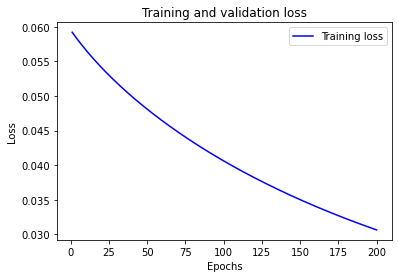

In [10]:
plt.plot( epochs, loss, 'b', label = 'Training loss' )
plt.title( 'Training and validation loss' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.legend()

plt.show()

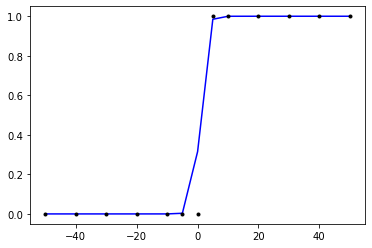

In [11]:
plt.plot( x, model.predict( x ), 'b', x, y, 'k.')

- x값이 5와 10 사이의 어떤 값일 때 y값이 0.5가 넘기 시작했다.

In [15]:
# x값이 5보다 작은 값일 때
print( model.predict([ 1, 2, 3, 4, 4.5 ] ) )

[[0.5527601]
 [0.7685449]
 [0.8992028]
 [0.9599472]
 [0.9751764]]


In [16]:
# x값이 10보다 큰 값일 때
print( model.predict([ 11, 21, 33, 44, 500 ] ) )

[[0.9999587]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]]


# 소프트맥스 회귀( Softmax Regression ) - 다중 클래스 분류

- 3개 이상의 선택지 중에서 1개를 고르는 다중 클래스 분류 문제를 소프트맥스 회귀( Softmax Regression )라 한다.

## 1. 다중 클래스 분류( Multi-class Classification )

- 이진 분류가 두 개의 선택지 중 하나를 고르는 문제였다면, 세 개이상의 선택지 중 하나를 고르는 문제를 다중 클래스 분류라고 한다.
- 대표적인 예가 붓꽃 데이터(iris dataset)에 대한 분류이다.
   - 꽃받침 길이, 꽃받침 폭, 꽃잎 길이, 꽃잎 폭으로 부터 setos, versicolor, virginica라는 3개의 품종 중 어떤 품종인지를 예측하는 문제로 전형적인 다중 클래스 분류 문제이다. 
   
|Sepal Length-cm(x1)|Sepal Width-cm(x2)|Petal Length-cm(x3)|Petal Width-cm(x4)|Species(y)|
|---:|---:|---:|---:|:---:|
|5.1|3.5|1.4|0.2|setosa|
|4.9|3.0|1.4|0.2|setosa|
|5.8|2.6|4.0|1.2|versicolor|
|6.7|3.0|5.2|2.3|virginica|
|5.6|2.8|4.9|2.0|virginica|

- 로지스틱 회귀에서 사용한 시그모이드 함수는 입력된 데이터에 대해서 0과 1사이의 값을 출력하여 해당 값이 둘 중 하나에 속 할 확률로 해석할 수 있다.
   - 예를 들어 0이 정상 메일, 1이 스팸 메일이라고 정의한다면, 시그모이드 함수의 0과 1사이의 출력값을 스팸 메일일 확률로 해석할 수 있었다. 확률값이 0.5를 넘으면 1에 더 가까우니까 스팸 메일로 판단하면 되고, 그 반대라면 정상 메일로 판단하면 된다.
   
   
- 세 개 이상의 정답지 중에서 고르는 문제
   - 시그모이드 함수를 사용한다면 입력된 샘플 데이터에 대해서 각 정답지에 대한 시그모이드 함수를 적용해 줄 수 있다. 만약 그렇게 한다면, 첫번째가 정답일 확률은 0.7, 두번째가 정답일 확률은 0.6 세번째가 정답일 확률은 0.4 등과 같은 출력을 얻을 수 있다. 하지만 이 전체 확률의 합계가 1이 되도록 하여 전체 정답지에 걸친 확률로 바꾸는 것이 이전 로지스틱 회귀와 같은 처리를 수행할 수 있다.
   
   
- 만약 하나의 샘플 데이터에 대한 예측값으로 모든 가능한 정답지에 대해서 정답일 확률의 합이 1이 되도록 구한다면
   - iris dataset에 대하여 setosa, versicolor, virginica 3개 중에 하나의 정답을 골라야 하는데 이 샘플 데이터가 setosa일 확률이 0.58, versicolor일 확률이 0.22, virgnica일 확률이 0.2와 같이 총 합이 1인 확률 분포를 구할 수 있게 해보자는 것이다 이와 같이 확률 분포의 합이 1이 되도록 만드는 함수가 소프트맥스 함수(Softmax Regression)이다.

## 2. 소프트맥스 함수 이해

- k차원의 배터에서 1번째 원소를 zi, i번째 클래스가 정답일 확률을 pi로 나타낸다고 하였을 때 소프트맥스 함수는 pi를 다음과 같이 정의한다.

\begin{equation*}
    P-{i} = \frac{e^{zi}}{\sum_{j=1}^ke^{zj}} for i = 1, 2, ..., k
\end{equation*}

- iris 문제에 소프트맥스 함수를 차근차근 적용해보면, iris 문제의 경우 k=3 이므로 3차원 백터 z = z1, z2, z3의 읩력을 받으면 소프트맥스 함수는 아래와 같은 출력을 리턴한다.

\begin{equation*}
    softmax(z) = [\frac{e^{z1}}{\sum_{j=1}^3e^{zj}}\frac{e^{z2}}
{\sum_{j=1}^3e^{zj}}\frac{e^{z3}}{\sum_{j=1}^3e^{zj}}] = [P1, P2, P3]
= \hat{y} = 예측값
\end{equation*}

- \frac = 분수표현할 때, \sum = 시그마, {}로 묶으면 분자 분모로 묶임
- P1, P2, P3 각각은 1번 클래스가 정답일 확률, 2번 클래스가 정답일 확률, 3번 클래스가 정답일 확률을 나타내며 각각 0과 1사이의 값으로 총 합은 1이 된다.
- 여기서 분류하고자 하는 3개 클래스 setos, verginica, versicolor이므로 이는 결국 주어진 입력이 verginica일 확률, setos일 확률, versicolor일 확률을 나타내는 값을 의미한다.
- 여기서 i가 1일 때는 verginica일 확률을 나타내고, 2일 때는 setosa일 확률, 3일 때는 versicolor일 확률이라고 지정하였다고 정하자.( 이 지정 순서는 문제를 풀고자 하는 사람의 무작위 선택이다.)
   - 식을 문제에 맞게 다시 작성하면
   
\begin{equation*}
    softmax(z) = [\frac{e^{z1}}{\sum_{j=1}^3e^{zj}}\frac{e^{z2}}
{\sum_{j=1}^3e^{zj}}\frac{e^{z3}}{\sum_{j=1}^3e^{zj}}] = [P1, P2, P3] = 
\hat{y} = [ Pverginica, Psetosa, Pversicolor ]
\end{equation*}

- 분류하고자 하는 클래스가 k개일 대, k차원의 백터를 입력받아서 모든 백터 원소의 값을 0과 1사이의 값으로 값을 변경하여 다시 k차원의 백터를 리턴한다는 내용의 식을 기재하였을 뿐이다.

### 2) 소프트맥스 함수 그림으로 이해

![Alt text]( softmax1_final_final_ver.png)

- 샘플 데이터를 1개씩 입력으로 받아 처리한다고 가정하고 이해( 배치 크기는 1 )

### 첫 번째 : 소프트맥스 함수의 입력

- 하나의 샘플 데이터는 4개의 독립변수 x를 가지는데 이는 모델이 4차원 백터를 입력으로 받음을 의미한다.
- 그런데 소프트맥스의 함수의 입력으로 사용되는 백터는 백터의 차원이 불류하고자 하는 클래스의 개수가 되어야 하므로 어떤 가중치 연산을 통해 3차원 백터로 변환되어야 한다.
- 위의 그림에서 소프트맥스 함수의 입력으로 사용되는 3차원 백터를 z로 표현하였다.

![Alt text]( softmaxbetween1and2.png )

- 샘플 데이터 백터를 소프트맥스 함수의 입력 백터로 차원을 축소하는 방법은 간단하다.
- 소프트맥스 함수의 입력 백터 z의 차원수만큼 결과값이 나오도록 가중치 곱을 진행한다.
- 위 그림에서 화살표는 총( 4 x 3 = 12 ) 12이며 전부 다른 가중치를 가지고, 학습 과정에서 접차적으로 오차를 최소화하는 가중치로 값이 변경된다.

### 두번째 : 오차 계산 방법

- 소프트맥스 함수의 출력은 분류하고자 하는 클래스의 개수만큼 차원을 가지는 벡터로 각 원소는 0과 1사이의 값을 가진다.
- 이 각각의 값은 특정 클래스의 정답일 확률을 나타낸다.
- iris 데이터셋이서 첫번째 원소인 P1은 virginica가 정답일 확률, 두 번째 원소인 P2는 setosa가 정답일 확률, 세번째 원소인 P3는 vesicolor가 정답일 확률로 고려하고자 한다면 이 예측값과 비교를 할 수 있는 실제값의 표현 방법이 있어야 한다.
- 소프트맥스 회귀에서는 실제값을 One-Hot 백터로 표현한다.

![Alt text]( softmax2_final.png )

- 소프트맥스 함수의 출력 백터의 첫번째 원소 P1가 virginica가 정답일 확률, 두번째 원소 P2가 setosa가 정답일 확률, 세번째 원소 P3가 vesicolor가 정답일 확률을 의미한다고 할 때, 각 실제값의 정수 인코딩 1, 2, 3이 되고 이에 One-Hot 인코딩을 수행하여 실제값을 One-Hot 백터로 수치화한 것을 보여준다.

![Alt text]( softmax4_final.png )

- 예로 iris 데이터셋의 샘플 데이터 실제값이 setosa라면 setosa의 One=Hot백터는 [ 0 1 0 ]이다. 이 경우 예측값과 실제값의 오차가 0이 되는 경우는 소프트맥스 함수의 결과가 [ 0 1 0 ]이 되는 경우이다.
- 이 두 백터의 오차를 계산하기 위해서 소프트맥스 회귀는 비용 함수( cost function )로 크로스 엔트로피(cross entopy) 함수를 사용한다.

![Alt text]( softmax5_final.png )

- 선형 회귀나 로지스틱 회귀와 마찬가지로 오차로부터 가중치를 업데이트 한다.

![Alt text]( softmax6_final_2ldz1s0.png )

- 선형 회귀나 로지스틱 회귀와 마찬가지로 편향 또한 업데이트 대상이 되는 매개변수이다.


- 소프트맥스 회귀를 백터와 행렬 연산으로 이해해 보면, 입력을 특성(feature)의 수만큼의 차원을 가진 입력 백터라 x라 하고, 가중치 행렬을 W, 평향을 b라고 하였을 때, 소프트맥스 회귀에서 예측값을 구하는과정을 백터와 행렬 연산으로 표현하면 다음과 같다.

![Alt text]( softmax7.png )

## 3. 비용 함수 ( Cost Function )

- 소프트맥스 회귀의 비용 함수는 크로스엔트로피 함수( crossentropy function )을 사용한다.


### 소프트맥스 회귀 비용 함수 - 크로스엔트로피 함수

\begin{equation*}
    cost(W) = -\sum_{j=1}^k{yj} log(Pj)
\end{equation*}

- y는 실제값을 나타내며, k는 클래스의 개수로 정의한다.
- yj는 실제값 One_Hot 백터의 j번째 인덱스를 의미하며, Pj는 샘플 데이터가 j번째 클래스일 확률을 나타낸다.

- c가 실제값 One-Hot 백터에서 1을 가진 원소의 인덱스라고 한다면, Pc = 1은 예측값 y가 실제값 y를 정확하게 예측한 경우가 된다.
- 이를 식에 대입하면 -1log( 1 ) = 0이 되기 때문에, 결과적으로 예측값 y가 실제값 y를 정확하게 예측한 경우의 크로스엔트로피 함수의 값은 0이 된다.


\begin{equation*}
    즉 -\sum_{j=1}^k{yj} log(Pj) 이 값을 최소화 하는 방향으로 학습해야 한다.
\end{equation*}

- n개의 전체 데이터에 대한 평균을 구한다고 하면 최종 비용 함수

\begin{equation*}
    cost(W) = -\frac {1}{n}\sum_{i=1}^n\sum_{j=1}^k{y^{(i)}_j} log(P^{(i)}_j)
\end{equation*}

## 4. 소프트맥스 회귀 - 다중 클래스 분류 실습

#### 4.1 iris 데이터셋 이해

In [18]:
df = pd.read_csv( 'iris.csv', encoding = 'latin1' )

In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
len(df)

150

In [23]:
df[ 'species' ].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

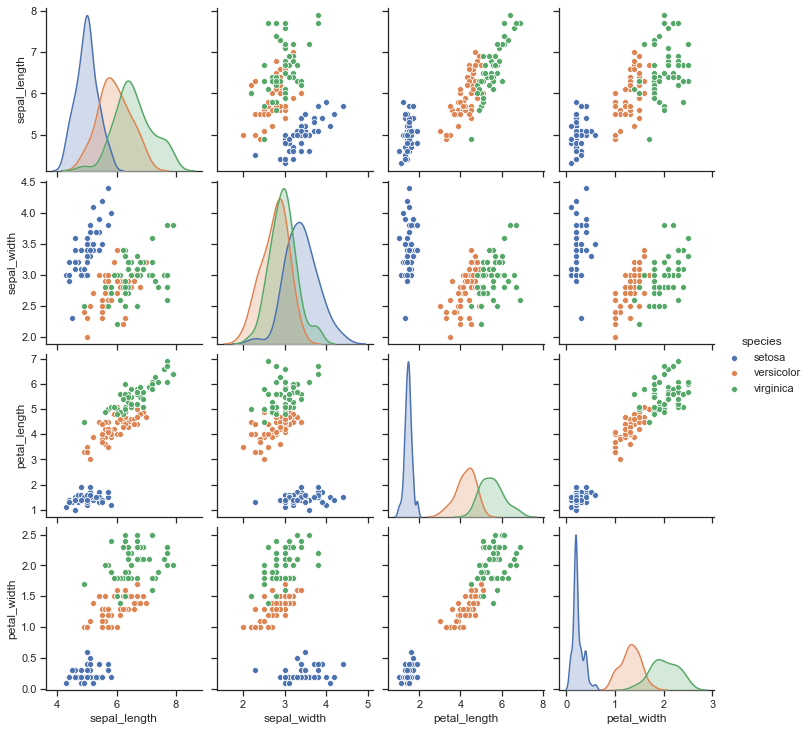

In [22]:
sns.set( style = 'ticks', color_codes =
        True )
sns.pairplot(df, hue = 'species' )

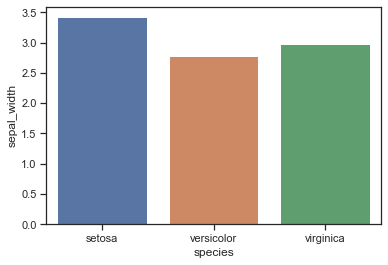

In [24]:
# 품종과 특성( sepal_width )과의 연관 관계
sns.barplot(df['species'], df['sepal_width'], ci = None)

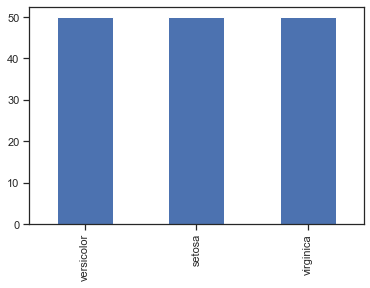

In [25]:
df[ 'species' ].value_counts().plot( kind = 'bar' )

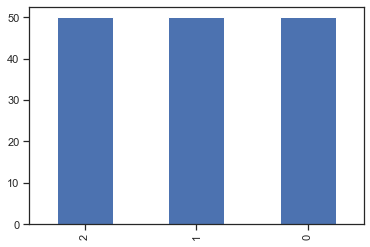

In [26]:
df[ 'species' ] = df[ 'species' ].replace( ['virginica', 'setosa', 'versicolor'], [ 0, 1, 2 ])
df[ 'species' ].value_counts().plot( kind = 'bar' )

In [27]:
X = df[ [ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' ] ].values
y = df[ 'species' ].values

In [28]:
print( X[ :5 ] )
print( y[ :5 ] )

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.8,
                                                     random_state = 1234)

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
# y에 대한 One-Hot encoding
y_train = to_categorical( y_train )
y_test = to_categorical( y_test )

In [32]:
print( y_train[ :5 ] )
print( y_test[ :5 ] )

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 4.2 소프트맥스 회귀 모델

- 활성화 함수( activation function, Hypethosis ) : softmax
- 학습률( learning rate ) : 0.01
- 손실 함수( loss function ) : cross-entropy function
- 옵티마이저( optimizer ) : adam( 경사하강법의 한 종류 )
- 배치사이즈 (batch size) : 1
- 에포크(epochs) : 200

In [43]:
model = Sequential()
model.add( Dense( 3, input_dim = 4, activation = 'softmax' ) )  
sgd = optimizers.SGD( lr = 0.01 )
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy',   
               metrics = ['accuracy'] )
hist = model.fit( X_train, y_train, batch_size = 1, epochs = 200,
                  validation_split = 0.2 )

Train on 96 samples, validate on 24 samples
Epoch 1/200
96/96 [==============================] - 1s 6ms/sample - loss: 2.3698 - accuracy: 0.2083 - val_loss: 2.4980 - val_accuracy: 0.0833
Epoch 2/200
96/96 [==============================] - 0s 1ms/sample - loss: 2.1116 - accuracy: 0.1979 - val_loss: 2.2279 - val_accuracy: 0.0417
Epoch 3/200
96/96 [==============================] - 0s 1ms/sample - loss: 1.9054 - accuracy: 0.1667 - val_loss: 2.0063 - val_accuracy: 0.0417
Epoch 4/200
96/96 [==============================] - 0s 1ms/sample - loss: 1.7516 - accuracy: 0.1458 - val_loss: 1.8345 - val_accuracy: 0.0417
Epoch 5/200
96/96 [==============================] - 0s 1ms/sample - loss: 1.6289 - accuracy: 0.1562 - val_loss: 1.6970 - val_accuracy: 0.0000e+00
Epoch 6/200
96/96 [==============================] - 0s 1ms/sample - loss: 1.5375 - accuracy: 0.1146 - val_loss: 1.6003 - val_accuracy: 0.0000e+00
Epoch 7/200
96/96 [==============================] - 0s 1ms/sample - loss: 1.4605 - accura

96/96 [==============================] - 0s 1ms/sample - loss: 0.5448 - accuracy: 0.5833 - val_loss: 0.5355 - val_accuracy: 0.6667
Epoch 58/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.5423 - accuracy: 0.5938 - val_loss: 0.5310 - val_accuracy: 0.6667
Epoch 59/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.5365 - accuracy: 0.5938 - val_loss: 0.5239 - val_accuracy: 0.7083
Epoch 60/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.5335 - accuracy: 0.6354 - val_loss: 0.5179 - val_accuracy: 0.7083
Epoch 61/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.5316 - accuracy: 0.5833 - val_loss: 0.5130 - val_accuracy: 0.7083
Epoch 62/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.5248 - accuracy: 0.6146 - val_loss: 0.5101 - val_accuracy: 0.7083
Epoch 63/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.5203 - accuracy: 0.6250 - val_loss: 0.5068 - val_accuracy: 0.7083
Epoch

Epoch 114/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.3902 - accuracy: 0.8646 - val_loss: 0.3459 - val_accuracy: 0.9583
Epoch 115/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.3869 - accuracy: 0.8958 - val_loss: 0.3422 - val_accuracy: 0.8750
Epoch 116/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.3831 - accuracy: 0.8750 - val_loss: 0.3376 - val_accuracy: 0.8333
Epoch 117/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.3810 - accuracy: 0.8750 - val_loss: 0.3356 - val_accuracy: 0.8333
Epoch 118/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.3796 - accuracy: 0.8854 - val_loss: 0.3339 - val_accuracy: 0.8750
Epoch 119/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.3784 - accuracy: 0.8750 - val_loss: 0.3342 - val_accuracy: 0.9583
Epoch 120/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.3753 - accuracy: 0.8958 - val_loss: 0.3321 - val_ac

96/96 [==============================] - 0s 1ms/sample - loss: 0.2999 - accuracy: 0.9271 - val_loss: 0.2427 - val_accuracy: 1.0000
Epoch 171/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.3004 - accuracy: 0.9479 - val_loss: 0.2402 - val_accuracy: 1.0000
Epoch 172/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.2999 - accuracy: 0.9375 - val_loss: 0.2400 - val_accuracy: 1.0000
Epoch 173/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.2973 - accuracy: 0.9375 - val_loss: 0.2384 - val_accuracy: 1.0000
Epoch 174/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.2983 - accuracy: 0.9271 - val_loss: 0.2435 - val_accuracy: 1.0000
Epoch 175/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.2950 - accuracy: 0.9271 - val_loss: 0.2372 - val_accuracy: 1.0000
Epoch 176/200
96/96 [==============================] - 0s 1ms/sample - loss: 0.2962 - accuracy: 0.9375 - val_loss: 0.2335 - val_accuracy: 1.0000

In [44]:
loss = hist.history[ 'loss' ]
val_loss = hist.history[ 'val_loss' ]

epochs = range( 1, len( hist.history['accuracy'] ) + 1 )

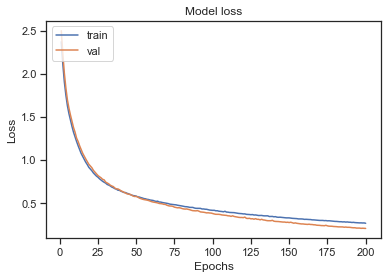

In [45]:
plt.plot( epochs, loss )
plt.plot( epochs, val_loss )
plt.title( 'Model loss' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.legend( [ 'train', 'val' ], loc = 'upper left' )

plt.show()

In [47]:
print( '테스트 정확도 : {:.4f}'.format( model.evaluate( X_test, y_test )[ 1 ] ) )

30/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 3ms/sample - loss: 0.2414 - accuracy: 1.0000
테스트 정확도 : 1.0000
